In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the diabetes dataset
diabetes_dataset = load_diabetes()
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [3]:
# Assign variables to store the data and the targets
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

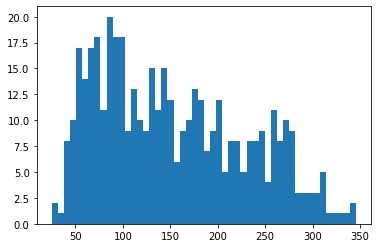

In [4]:
plt.figure(1)
plt.hist(targets, bins=50)
plt.show()

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()

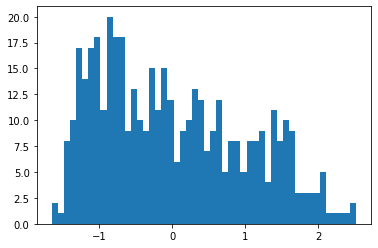

In [6]:
plt.figure(2)
plt.hist(targets, bins=50)
plt.show()

In [7]:
# Split the data into train and test sets
train_data, test_data, train_targets, test_targets = train_test_split(
    data, targets, test_size=0.1)

In [9]:
rate = 0.3 # dropout rate

# Feedforward model with batch norm layers
model = Sequential([
    Dense(128, activation="relu", input_shape=(train_data.shape[1],)),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(rate),
    Dense(1)
])

In [10]:
# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

In [23]:
# Alter the parameters of the earlystopping class
earlystopping = EarlyStopping(patience=10, monitor="val_loss", min_delta=0.001)

In [24]:
# Fit the model
model.fit(train_data, train_targets, epochs=100,
         batch_size=64, validation_split=0.2, callbacks=[earlystopping])

Epoch 1/100
5/5 [==============================] - 0s 15ms/step - loss: 0.4993 - mae: 0.5852 - val_loss: 0.3644 - val_mae: 0.4667
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4650 - mae: 0.5457 - val_loss: 0.3620 - val_mae: 0.4647
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4389 - mae: 0.5376 - val_loss: 0.3610 - val_mae: 0.4619
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4860 - mae: 0.5655 - val_loss: 0.3607 - val_mae: 0.4586
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4491 - mae: 0.5410 - val_loss: 0.3601 - val_mae: 0.4570
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5200 - mae: 0.5822 - val_loss: 0.3596 - val_mae: 0.4565
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4659 - mae: 0.5567 - val_loss: 0.3592 - val_mae: 0.4561
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 0.4756 - mae: 0.5581 - va

In [25]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6661 - mae: 0.6465


[0.6660817265510559, 0.6465321183204651]